In [1]:
# display
import matplotlib.pyplot as plt
%matplotlib inline

# base modules
import os
import sys
import copy
import logging
import numpy as np
import pandas as pd
import math

# for Machine Learning
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [2]:
# path to repo
path_to_repo = os.path.dirname(os.getcwd())
print(path_to_repo)

sys.path.insert(0, os.path.join(path_to_repo, 'src'))

# custom module
from emlyon.utils import *

/Users/grantyong/Downloads/ML Assignment


In [3]:
# path to dataset
path_to_dataset = os.path.join(path_to_repo, "data", "train.csv")
path_to_dataset

'/Users/grantyong/Downloads/ML Assignment/data/train.csv'

In [43]:
# read data
df = pd.read_csv(path_to_dataset)
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [44]:
# drop id column
df.drop("id", axis=1, inplace=True)

In [45]:
# view all column names
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [46]:
# check number of columns
len(df.columns)

28

In [47]:
# number of rows and columns 
df.shape

(74111, 28)

In [48]:
# view datatype of columns
df.dtypes

log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [49]:
# remove rows with 0 or negative price
df = df[df.log_price > 0]
df.shape

(74110, 28)

 only 1 row with 0 or negative price

In [50]:
# view columns with null values
df.isna().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [51]:
df["review_scores_rating"].mean(),df["review_scores_rating"].median()

(94.06748797658047, 96.0)

In [52]:
# fill na with mean values for the following columns
df["bathrooms"] = df["bathrooms"].fillna(int(df["bathrooms"].mean()))
df["bedrooms"] = df["bedrooms"].fillna(int(df["bedrooms"].mean()))
df["beds"] = df["beds"].fillna(int(df["beds"].mean()))
df["review_scores_rating"] = df["review_scores_rating"].fillna(df["review_scores_rating"].mean())

/var/folders/9p/3vb029cj5298_nlwpszm2qp40000gn/T/ipykernel_11170/1673347312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bathrooms"] = df["bathrooms"].fillna(int(df["bathrooms"].mean()))
/var/folders/9p/3vb029cj5298_nlwpszm2qp40000gn/T/ipykernel_11170/1673347312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms"] = df["bedrooms"].fillna(int(df["bedrooms"].mean()))
/var/folders/9p/3vb029cj5298_nlwpszm2qp40000gn/T/ipykernel_11170/1673347312.py:4: SettingWithCopyWarning: 
A value is t

In [53]:
# drop columns
df = df.drop(["description","first_review","last_review","host_since","host_has_profile_pic",
              "name","thumbnail_url","zipcode","neighbourhood","latitude","longitude"],axis=1)

In [54]:
# Changing all boolean objects to 0/1
df["host_identity_verified"] = df.host_identity_verified.apply(lambda x: True if x=='t' else False)
df["instant_bookable"] = df.instant_bookable.apply(lambda x: True if x=='t' else False)

In [55]:
# change % to decimal, fill na with median value
df["host_response_rate"] = df["host_response_rate"].map(lambda x: int(x.rstrip("%")) if isinstance(x,str) else x)
df["host_response_rate"] = df["host_response_rate"].map(lambda x: x/100 if isinstance(x,float) else x)
df["host_response_rate"] = df["host_response_rate"].fillna(df["host_response_rate"].median())

In [58]:
df["host_response_rate"].unique()

array([1.  , 0.71, 0.68, 0.67, 0.83, 0.5 , 0.9 , 0.86, 0.92, 0.82, 0.8 ,
       0.89, 0.93, 0.99, 0.  , 0.88, 0.96, 0.7 , 0.94, 0.91, 0.25, 0.95,
       0.98, 0.62, 0.29, 0.33, 0.81, 0.63, 0.38, 0.6 , 0.79, 0.78, 0.75,
       0.65, 0.97, 0.87, 0.4 , 0.54, 0.53, 0.58, 0.76, 0.3 , 0.64, 0.17,
       0.2 , 0.77, 0.73, 0.41, 0.59, 0.57, 0.85, 0.56, 0.42, 0.44, 0.35,
       0.14, 0.74, 0.27, 0.1 , 0.84, 0.06, 0.72, 0.36, 0.55, 0.43, 0.13,
       0.39, 0.46, 0.26, 0.61, 0.52, 0.23, 0.22, 0.69, 0.66, 0.15, 0.11,
       0.31, 0.21, 0.47])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74110 entries, 0 to 74110
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74110 non-null  float64
 1   property_type           74110 non-null  object 
 2   room_type               74110 non-null  object 
 3   amenities               74110 non-null  object 
 4   accommodates            74110 non-null  int64  
 5   bathrooms               74110 non-null  float64
 6   bed_type                74110 non-null  object 
 7   cancellation_policy     74110 non-null  object 
 8   cleaning_fee            74110 non-null  bool   
 9   city                    74110 non-null  object 
 10  host_identity_verified  74110 non-null  bool   
 11  host_response_rate      74110 non-null  float64
 12  instant_bookable        74110 non-null  bool   
 13  number_of_reviews       74110 non-null  int64  
 14  review_scores_rating    74110 non-null

In [60]:
df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [61]:
# numericalize values in room_type (Entire home/apt = 1, Private room = 2, Shared room = 3)
numericalize(df,df["room_type"],"room_type",None)
df["room_type"].value_counts()

1    41310
2    30638
3     2162
Name: room_type, dtype: int64

In [62]:
# view bed_type values and count of values
df["bed_type"].value_counts()

Real Bed         72027
Futon              753
Pull-out Sofa      585
Airbed             477
Couch              268
Name: bed_type, dtype: int64

In [63]:
# numericalize bed_type values (Real bed = 1, Others = 2)
df["bed_type"] = df["bed_type"].apply(lambda x: 1 if x=='Real Bed' else 2)
df["bed_type"].value_counts()

1    72027
2     2083
Name: bed_type, dtype: int64

In [64]:
df["cancellation_policy"].value_counts()

strict             32373
flexible           22545
moderate           19063
super_strict_30      112
super_strict_60       17
Name: cancellation_policy, dtype: int64

> There are very few rows of super_strict_30 and super_strict_60. We will group them with strict.

In [65]:
df["cancellation_policy"] = df["cancellation_policy"].apply(lambda x: 1 if x=='flexible' 
                                                            else 2 if x=='moderate' else 3)

In [66]:
# numericalize column (flexible = 1, moderate = 2, strict = 3)
#numericalize(df,df["cancellation_policy"],"cancellation_policy",None)
df["cancellation_policy"].value_counts()

3    32502
1    22545
2    19063
Name: cancellation_policy, dtype: int64

In [67]:
df["city"].unique()

array(['NYC', 'SF', 'DC', 'LA', 'Chicago', 'Boston'], dtype=object)

In [68]:
# split the 6 cities into 6 columns of 0/1 values
df = pd.concat([df, pd.get_dummies(df['city'], prefix='city')],axis=1)

In [69]:
# drop city column
df = df.drop(['city'],axis=1)

In [70]:
# split string in amenities column, append items to list
amenities_col = []
for s in df["amenities"]:
    s = s.replace('{','')
    s = s.replace('}','')
    s = s.replace('"','')
    s = s.split(',')
    amenities_col.append(max(len(s)-1,0))

In [71]:
# create new column as count of amenities
df["amenities_count"] = pd.Series(amenities_col)
df

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_identity_verified,...,review_scores_rating,bedrooms,beds,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,amenities_count
0,5.010635,Apartment,1,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1,3,True,True,...,100.000000,1.0,1.0,0,0,0,0,1,0,8.0
1,5.129899,Apartment,1,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1,3,True,False,...,93.000000,3.0,3.0,0,0,0,0,1,0,14.0
2,4.976734,Apartment,1,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1,2,True,True,...,92.000000,1.0,3.0,0,0,0,0,1,0,18.0
3,6.620073,House,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,1,1,True,True,...,94.067488,2.0,2.0,0,0,0,0,0,1,14.0
4,4.744932,Apartment,1,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,1,2,True,True,...,40.000000,0.0,1.0,0,0,1,0,0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Apartment,2,{},1,1.0,1,1,False,True,...,94.067488,1.0,1.0,0,0,0,0,1,0,15.0
74107,5.043425,Apartment,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,1,2,True,False,...,93.000000,2.0,4.0,0,0,0,1,0,0,30.0
74108,5.220356,Apartment,1,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,1,2,True,True,...,94.000000,2.0,2.0,0,0,0,0,1,0,14.0
74109,5.273000,Apartment,1,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,1,3,True,False,...,94.067488,0.0,2.0,0,0,0,0,1,0,17.0


> It seems last row is appearing as NaN, we will check the number of NaN rows

In [72]:
df["amenities_count"].isna().value_counts()

False    74109
True         1
Name: amenities_count, dtype: int64

> Only 1 row. We will fill up the NaN value with mean. Since it is of "Boat" property type we will use mean of "Boat".

In [73]:
property_type_boats = df[df['property_type'].str.contains("Boat")]

In [74]:
df["amenities_count"] = df["amenities_count"].fillna(int(property_type_boats["amenities_count"].mean()))

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74110 entries, 0 to 74110
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74110 non-null  float64
 1   property_type           74110 non-null  object 
 2   room_type               74110 non-null  int8   
 3   amenities               74110 non-null  object 
 4   accommodates            74110 non-null  int64  
 5   bathrooms               74110 non-null  float64
 6   bed_type                74110 non-null  int64  
 7   cancellation_policy     74110 non-null  int64  
 8   cleaning_fee            74110 non-null  bool   
 9   host_identity_verified  74110 non-null  bool   
 10  host_response_rate      74110 non-null  float64
 11  instant_bookable        74110 non-null  bool   
 12  number_of_reviews       74110 non-null  int64  
 13  review_scores_rating    74110 non-null  float64
 14  bedrooms                74110 non-null

In [76]:
# Convert amenities_count to int to make sure all values are whole numbers
df['amenities_count'] = df['amenities_count'].astype(int)

In [78]:
df = df.drop(["amenities"], axis=1)

In [77]:
# Convert values to decimal points
df["review_scores_rating"] = df["review_scores_rating"]/100

In [79]:
# check unique values in property_type
df.property_type.unique()

array(['Apartment', 'House', 'Condominium', 'Loft', 'Townhouse', 'Hostel',
       'Guest suite', 'Bed & Breakfast', 'Bungalow', 'Guesthouse', 'Dorm',
       'Other', 'Camper/RV', 'Villa', 'Boutique hotel', 'Timeshare',
       'In-law', 'Boat', 'Serviced apartment', 'Castle', 'Cabin',
       'Treehouse', 'Tipi', 'Vacation home', 'Tent', 'Hut',
       'Casa particular', 'Chalet', 'Yurt', 'Earth House',
       'Parking Space', 'Train', 'Cave', 'Lighthouse', 'Island'],
      dtype=object)

> We will numericalize the column by applying each property type with its mean log price  

In [80]:
types = df["property_type"].unique()
pt_map = {}
for t in types:
    m = df[df["property_type"] == t]['log_price'].mean() # get mean log price of each property type
    pt_map[t] = m # Assign value mean "m" to key property_type "t" in dictionary

pt_map

{'Apartment': 4.758850025405184,
 'House': 4.797113575777436,
 'Condominium': 5.028430393805644,
 'Loft': 5.0079187888927565,
 'Townhouse': 4.833538580315444,
 'Hostel': 3.6473330657197867,
 'Guest suite': 4.717513044476204,
 'Bed & Breakfast': 4.556067512313946,
 'Bungalow': 4.783267621119243,
 'Guesthouse': 4.685184390801043,
 'Dorm': 3.7461402760246605,
 'Other': 4.946366802624568,
 'Camper/RV': 4.602237913420423,
 'Villa': 5.112426896999262,
 'Boutique hotel': 5.083351792436799,
 'Timeshare': 5.602600194590793,
 'In-law': 4.816649318167724,
 'Boat': 5.200864630766853,
 'Serviced apartment': 5.147466758209801,
 'Castle': 5.368423806591423,
 'Cabin': 4.646498617159732,
 'Treehouse': 4.84552011428258,
 'Tipi': 5.246117704219109,
 'Vacation home': 5.420951027891479,
 'Tent': 4.197130952488377,
 'Hut': 4.022836929917487,
 'Casa particular': 4.382026634673881,
 'Chalet': 4.764325278519716,
 'Yurt': 4.944359564178421,
 'Earth House': 5.285391225758667,
 'Parking Space': 4.605170185988092,

In [81]:
df["property_type"] = df["property_type"].apply(lambda x : pt_map[x]) # apply changes to column

In [82]:
df

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,...,review_scores_rating,bedrooms,beds,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,amenities_count
0,5.010635,4.758850,1,3,1.0,1,3,True,True,1.0,...,1.000000,1.0,1.0,0,0,0,0,1,0,8
1,5.129899,4.758850,1,7,1.0,1,3,True,False,1.0,...,0.930000,3.0,3.0,0,0,0,0,1,0,14
2,4.976734,4.758850,1,5,1.0,1,2,True,True,1.0,...,0.920000,1.0,3.0,0,0,0,0,1,0,18
3,6.620073,4.797114,1,4,1.0,1,1,True,True,1.0,...,0.940675,2.0,2.0,0,0,0,0,0,1,14
4,4.744932,4.758850,1,2,1.0,1,2,True,True,1.0,...,0.400000,0.0,1.0,0,0,1,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,4.758850,2,1,1.0,1,1,False,True,1.0,...,0.940675,1.0,1.0,0,0,0,0,1,0,15
74107,5.043425,4.758850,1,4,2.0,1,2,True,False,1.0,...,0.930000,2.0,4.0,0,0,0,1,0,0,30
74108,5.220356,4.758850,1,5,1.0,1,2,True,True,1.0,...,0.940000,2.0,2.0,0,0,0,0,1,0,14
74109,5.273000,4.758850,1,2,1.0,1,3,True,False,1.0,...,0.940675,0.0,2.0,0,0,0,0,1,0,17


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74110 entries, 0 to 74110
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74110 non-null  float64
 1   property_type           74110 non-null  float64
 2   room_type               74110 non-null  int8   
 3   accommodates            74110 non-null  int64  
 4   bathrooms               74110 non-null  float64
 5   bed_type                74110 non-null  int64  
 6   cancellation_policy     74110 non-null  int64  
 7   cleaning_fee            74110 non-null  bool   
 8   host_identity_verified  74110 non-null  bool   
 9   host_response_rate      74110 non-null  float64
 10  instant_bookable        74110 non-null  bool   
 11  number_of_reviews       74110 non-null  int64  
 12  review_scores_rating    74110 non-null  float64
 13  bedrooms                74110 non-null  float64
 14  beds                    74110 non-null

In [84]:
# ---------------- End of Data Cleaning & Preprocessing ---------------- #

In [85]:
df1 = df.copy()

> Since we are predicting price, which is a continuous value and not a category, we will be using regression methods.

In [86]:
x,y,_ = proc_df(df1,'log_price')

In [87]:
x

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,...,review_scores_rating,bedrooms,beds,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,amenities_count
0,4.758850,1,3,1.0,1,3,True,True,1.0,False,...,1.000000,1.0,1.0,0,0,0,0,1,0,8
1,4.758850,1,7,1.0,1,3,True,False,1.0,True,...,0.930000,3.0,3.0,0,0,0,0,1,0,14
2,4.758850,1,5,1.0,1,2,True,True,1.0,True,...,0.920000,1.0,3.0,0,0,0,0,1,0,18
3,4.797114,1,4,1.0,1,1,True,True,1.0,False,...,0.940675,2.0,2.0,0,0,0,0,0,1,14
4,4.758850,1,2,1.0,1,2,True,True,1.0,True,...,0.400000,0.0,1.0,0,0,1,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.758850,2,1,1.0,1,1,False,True,1.0,False,...,0.940675,1.0,1.0,0,0,0,0,1,0,15
74107,4.758850,1,4,2.0,1,2,True,False,1.0,False,...,0.930000,2.0,4.0,0,0,0,1,0,0,30
74108,4.758850,1,5,1.0,1,2,True,True,1.0,True,...,0.940000,2.0,2.0,0,0,0,0,1,0,14
74109,4.758850,1,2,1.0,1,3,True,False,1.0,True,...,0.940675,0.0,2.0,0,0,0,0,1,0,17


In [88]:
y

array([5.01063529, 5.12989871, 4.97673374, ..., 5.22035583, 5.27299956,
       4.85203026])

In [89]:
model = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 42)

model.fit(x, y)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)

In [90]:
x1 = x.iloc[0]
y_true = np.exp(y[0])
x1, y_true

(property_type             4.75885
 room_type                       1
 accommodates                    3
 bathrooms                     1.0
 bed_type                        1
 cancellation_policy             3
 cleaning_fee                 True
 host_identity_verified       True
 host_response_rate            1.0
 instant_bookable            False
 number_of_reviews               2
 review_scores_rating          1.0
 bedrooms                      1.0
 beds                          1.0
 city_Boston                     0
 city_Chicago                    0
 city_DC                         0
 city_LA                         0
 city_NYC                        1
 city_SF                         0
 amenities_count                 8
 Name: 0, dtype: object,
 150.00000000000009)

In [91]:
x1 = [x1]                   # wrap the data point into a list
y_pred = model.predict(x1) # prediction, as list
y_pred = y_pred[0]        # take first element of predicted list
y_pred = np.exp(y_pred)   # exponentialize
y_pred

/Users/grantyong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


150.41268592857665

In [92]:
model.score(x, y)

0.9022470014168135

In [93]:
# function to split dataset
def split_vals(x, n): 
    return x[:n].copy(), x[n:].copy()

In [94]:
# setting train, subset and validation set sizes

n_total = len(x)
n_valid = int(len(x)*0.2)  # 20% of dataset
n_train = n_total - n_valid
n_small = int(len(x)*0.25)  # 25% of dataset

print('full number of data points : {}'.format(n_total))
print('number of validation data points : {}'.format(n_valid))
print('number of training data points : {}'.format(n_train))
print('number of subsampled training points : {}'.format(n_small))

full number of data points : 74110
number of validation data points : 14822
number of training data points : 59288
number of subsampled training points : 18527


In [95]:
# splitting data to train, small and valid

X_train, X_valid = split_vals(x, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small, _ = split_vals(X_train, n_small)
y_small, _ = split_vals(y_train, n_small)

print('Number of small training data points: X = {}, y = {}'.format(X_small.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid.shape, y_valid.shape))

Number of small training data points: X = (18527, 21), y = (18527,)
Number of full training data points: X = (59288, 21), y = (59288,)
Number of validation data points: X = (14822, 21), y = (14822,)


In [96]:
# function to calculate rmse
def rmse(y_gold, y_pred): 
    return math.sqrt(((y_gold - y_pred)**2).mean())

In [97]:
# function to print scores
def print_score(m, X_train, y_train, X_valid, y_valid):
    print('RMSE on train set: {:.4f}'.format(rmse(m.predict(X_train), y_train)))
    print('RMSE on valid set: {:.4f}'.format(rmse(m.predict(X_valid), y_valid)))
    print('R^2 on train set: {:.4f}'.format(m.score(X_train, y_train)))
    print('R^2 on valid set: {:.4f}'.format(m.score(X_valid, y_valid)))
    if hasattr(m, 'oob_score_'): print('R^2 on oob set: {:.4f}'.format(m.oob_score_))
    return

In [98]:
# trying a base model on subset of data
base_model = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 42)

%time base_model.fit(X_small, y_small)
print_score(base_model, X_small, y_small, X_valid, y_valid)

CPU times: user 758 ms, sys: 15.2 ms, total: 773 ms
Wall time: 188 ms
RMSE on train set: 0.2114
RMSE on valid set: 0.4995
R^2 on train set: 0.9129
R^2 on valid set: 0.5172


In [99]:
# model on full training data
base_model = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 42)

%time base_model.fit(X_train, y_train)
print_score(base_model, X_train, y_train, X_valid, y_valid)

CPU times: user 2.34 s, sys: 22 ms, total: 2.37 s
Wall time: 512 ms
RMSE on train set: 0.2217
RMSE on valid set: 0.4881
R^2 on train set: 0.9043
R^2 on valid set: 0.5390


> It seems we are overfitting badly

In [100]:
# Trying more parameters to find optimum score (Try 1)

model = RandomForestRegressor(
    # parameters shared with DecisionTreeRegressor
    n_estimators = 50, # 100 # 1 = the model is a single tree
    criterion = 'squared_error', 
    max_depth = 10, # None
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0,
    ccp_alpha = 0.0, 
    random_state = 42, # None, 
    
    # RandomForestRegressor specific hyperparameters
    bootstrap = True,
    oob_score = True, 
    max_samples = None,

    # extra parameters
    warm_start = False, 
    n_jobs = -1, # None 
    verbose = 0, 
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 5.15 s, sys: 43.1 ms, total: 5.19 s
Wall time: 934 ms
RMSE on train set: 0.4248
RMSE on valid set: 0.4560
R^2 on train set: 0.6487
R^2 on valid set: 0.5976
R^2 on oob set: 0.6043


In [101]:
# Trying more parameters to find optimum score (Try 2)

model = RandomForestRegressor(
    n_estimators = 40, 
    criterion = 'squared_error', 
    
    # stoping criteria
    max_depth = 15,
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    ccp_alpha = 0.0, 
 
    # bagging parameters
    max_features = 0.5, 
    bootstrap = True,
    oob_score = True, 
    max_samples = None,
    
    # other
    warm_start = False, 
    n_jobs = -1, # None 
    random_state = 42, # None,
    verbose = 0, 
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 3.33 s, sys: 32.6 ms, total: 3.36 s
Wall time: 674 ms
RMSE on train set: 0.3635
RMSE on valid set: 0.4518
R^2 on train set: 0.7428
R^2 on valid set: 0.6051
R^2 on oob set: 0.6063


In [102]:
# Trying more parameters to find optimum score (Try 3)

model = RandomForestRegressor(
    n_estimators = 100,
    min_samples_split = 15,
    max_features = 0.75, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 11.8 s, sys: 99.6 ms, total: 11.9 s
Wall time: 2.26 s
RMSE on train set: 0.3507
RMSE on valid set: 0.4542
R^2 on train set: 0.7605
R^2 on valid set: 0.6009
R^2 on oob set: 0.6076


In [154]:
# Try 4

model = RandomForestRegressor(
        n_estimators = 87,
        min_samples_split = 16,
        max_depth = 10,
        n_jobs = -1, 
        max_features = 0.5,
        random_state = 42,
        min_samples_leaf = 3,
        max_leaf_nodes = 520, 
    
        bootstrap = True,
        oob_score = True, # default = False, 
        max_samples = 0.68, # default = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 3.89 s, sys: 42.1 ms, total: 3.93 s
Wall time: 930 ms
RMSE on train set: 0.4340
RMSE on valid set: 0.4533
R^2 on train set: 0.6334
R^2 on valid set: 0.6023
R^2 on oob set: 0.6079


> It seems the model above might be the best score we could get. Lets see the feature importances.

<AxesSubplot:>

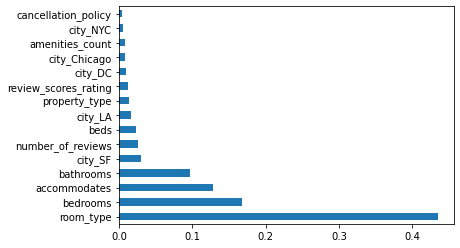

In [104]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')

> We see that room_type is the most significant decider of price. Other features like bedrooms, accomodates and bathrooms also have a big role to play.

> Lets see if we can get better scores with xgboost and catboost.

In [105]:
model = XGBRegressor()

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 15.6 s, sys: 1.45 s, total: 17.1 s
Wall time: 2.35 s
RMSE on train set: 0.4081
RMSE on valid set: 0.4501
R^2 on train set: 0.6757
R^2 on valid set: 0.6080


> We see immediately xgboost produced a better score with no parameters. Lets see the feature importances again.

<AxesSubplot:>

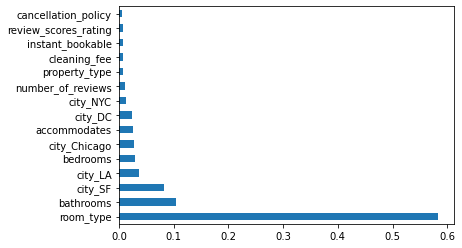

In [106]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')

> Again room_type is the biggest decider of price. Some features have less importance than they did in the previous model.

> Lets see if catboost gives a better score.

In [107]:
# base catboost model
model = CatBoostRegressor(logging_level = 'Silent')

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 10.9 s, sys: 3.58 s, total: 14.5 s
Wall time: 3.9 s
RMSE on train set: 0.4168
RMSE on valid set: 0.4449
R^2 on train set: 0.6619
R^2 on valid set: 0.6171


> A default catboost model returned a higher score than xgboost. We will try placing some parameters.

In [108]:
# Catboost try 1

model = CatBoostRegressor(
    n_estimators = 300,
    max_depth = 10,
    random_seed = 42,
    logging_level = 'Silent',
    learning_rate = 0.04,
    )

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 8.23 s, sys: 1.3 s, total: 9.53 s
Wall time: 2.46 s
RMSE on train set: 0.4197
RMSE on valid set: 0.4452
R^2 on train set: 0.6571
R^2 on valid set: 0.6165


In [135]:
# Catboost try 2

model = CatBoostRegressor(
    n_estimators = 850,
    max_depth = 9,
    random_seed = 100,
    logging_level = 'Silent',
    learning_rate = 0.04,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 13.5 s, sys: 4.06 s, total: 17.5 s
Wall time: 4.81 s
RMSE on train set: 0.4037
RMSE on valid set: 0.4432
R^2 on train set: 0.6827
R^2 on valid set: 0.6200


In [159]:
# Catboost try 3

model = CatBoostRegressor(
    n_estimators = 850,
    max_depth = 9,
    random_seed = 100,
    logging_level = 'Silent',
    learning_rate = 0.038,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 13.3 s, sys: 4.12 s, total: 17.4 s
Wall time: 4.86 s
RMSE on train set: 0.4054
RMSE on valid set: 0.4432
R^2 on train set: 0.6801
R^2 on valid set: 0.6200


> Catboost produced the best score overall.

<AxesSubplot:>

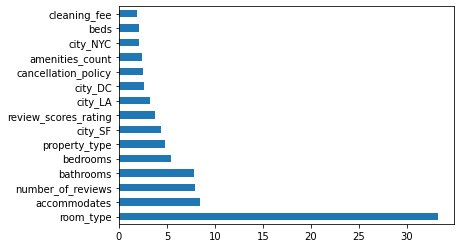

In [160]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')

> No surprise as room_type leads the importance of pricing by a mile again, but overall seems to have less importance compared to the RandomForest and xgboost models.

> Looking at the scores of others on Kaggle (https://www.kaggle.com/datasets/stevezhenghp/airbnb-price-prediction/code), it seems we have obtained similar or slightly better scores compared to most of them.